# Model Preparation

Before training, we define each model. For models like SVM and KNN, we must ensure they are configures to handle multi-class probability (since we have 5 categories).


In [11]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(
        kernel='rbf',
        C=1.0,   
        gamma='scale',
        probability=True,
        cache_size=1000,
        max_iter=2000,
        tol=1e-3,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

In [3]:
df = pd.read_csv("./data/processed/thyroid_dataset_cleaned.csv")

In [4]:
df.head()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target,target_category
0,0,-0.866667,0,0,0,0,0,0,0,0,...,0,0,0,-0.706052,0.000000,0.000000,0.000000,0.000000,-,0
1,1,-0.866667,0,0,0,0,0,0,0,0,...,0,0,0,0.151721,-0.166667,0.666667,0.000000,0.000000,-,0
2,2,-0.466667,0,0,0,0,0,0,0,0,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,-,0
3,3,-0.633333,0,0,0,0,0,0,0,0,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,-,0
4,4,-0.766667,0,0,0,0,0,0,0,0,...,0,0,0,-0.112578,-1.666667,-0.083333,-0.333333,0.258065,S,4


# Training Loop

We will iterate through the models list, training each model on the SMOTE-balanced training data (X_train_res, y_train_res) and testing them on the original imbalanced test data (X_test). This simulates real-world performance.


In [5]:
# Drop the target columns to isolate features
X = df.drop(columns=['target', 'target_category', 'target_label'], errors='ignore')
y = df['target_category']

# Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to create the 'res' (resampled) variables
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the results dictionary
results = {}

## Random Forest


In [6]:
# Fit the model
models["Random Forest"].fit(X_train_res, y_train_res)

# Make predictions
y_pred = models["Random Forest"].predict(X_test)
y_proba = models["Random Forest"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["Random Forest"] = {
    "model_object": models["Random Forest"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ Random Forest training complete.")

✅ Random Forest training complete.


## Support Vector Machine


In [7]:
X_train_svm = X_train_res.sample(frac=0.2, random_state=42)
y_train_svm = y_train_res.loc[X_train_svm.index]

# Fit the model
models["SVM"].fit(X_train_svm, y_train_svm)

# Make predictions
y_pred = models["SVM"].predict(X_test)
y_proba = models["SVM"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["SVM"] = {
    "model_object": models["SVM"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ SVM training complete.")

✅ SVM training complete.


## Gradient Boosting


In [8]:
# Fit the model
models["Gradient Boosting"].fit(X_train_res, y_train_res)

# Make predictions
y_pred = models["Gradient Boosting"].predict(X_test)
y_proba = models["Gradient Boosting"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["Gradient Boosting"] = {
    "model_object": models["Gradient Boosting"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ Gradient Boosting training complete.")

✅ Gradient Boosting training complete.


## Decision Tree


In [9]:
# Fit the model
models["Decision Tree"].fit(X_train_res, y_train_res)

# Make predictions
y_pred = models["Decision Tree"].predict(X_test)
y_proba = models["Decision Tree"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["Decision Tree"] = {
    "model_object": models["Decision Tree"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ Decision Tree training complete.")

✅ Decision Tree training complete.


## Logistic Regression


In [ ]:
# Fit the model
models["Logistic Regression"].fit(X_train_res, y_train_res)

# Make predictions
y_pred = models["Logistic Regression"].predict(X_test)
y_proba = models["Logistic Regression"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["Logistic Regression"] = {
    "model_object": models["Logistic Regression"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ Logistic Regression training complete.")

✅ Logistic Regression training complete.


c:\Ahmed\projects\thyroid_disease\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## k-Nearest Neighbors (k-NN)


In [13]:
# Fit the model
models["k-NN"].fit(X_train_res, y_train_res)

# Make predictions
y_pred = models["k-NN"].predict(X_test)
y_proba = models["k-NN"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["k-NN"] = {
    "model_object": models["k-NN"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ k-NN training complete.")

✅ k-NN training complete.


## Naive Bayes


In [14]:
# Fit the model
models["Naive Bayes"].fit(X_train_res, y_train_res)

# Make predictions
y_pred = models["Naive Bayes"].predict(X_test)
y_proba = models["Naive Bayes"].predict_proba(X_test) # Probability for ROC-AUC
    
# Store results for evaluation
results["Naive Bayes"] = {
    "model_object": models["Naive Bayes"],
    "predictions": y_pred,
    "probabilities": y_proba
}

print(f"✅ Naive Bayes training complete.")

✅ Naive Bayes training complete.


# Evaluation Metrics (The "Leaderboard")

In medical data analytics, We don't just look at accuracy, but we also look at precision, recall, and F1-score.


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_list = []

for name, data in results.items():
    y_pred = data["predictions"]
    
    metrics_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (Macro)": recall_score(y_test, y_pred, average='macro'),
        "F1-Score (Macro)": f1_score(y_test, y_pred, average='macro')
    })

leaderboard = pd.DataFrame(metrics_list).sort_values(by="F1-Score (Macro)", ascending=False)
leaderboard

c:\Ahmed\projects\thyroid_disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Random Forest,0.925218,0.803090,0.893406,0.843730
3,Decision Tree,0.919214,0.775964,0.864473,0.815707
2,Gradient Boosting,0.906659,0.755064,0.878629,0.807238
4,Logistic Regression,0.723799,0.577660,0.749141,0.632557
6,Naive Bayes,0.347162,0.381630,0.569842,0.378112
5,k-NN,0.459061,0.272460,0.341100,0.283249
1,SVM,0.062227,0.159764,0.151351,0.047165


# Clinical Deep-dive

The final step is to visualize where the models are failing. For your top-performing model (Random Forest), we should generate a Confusion Matrix.

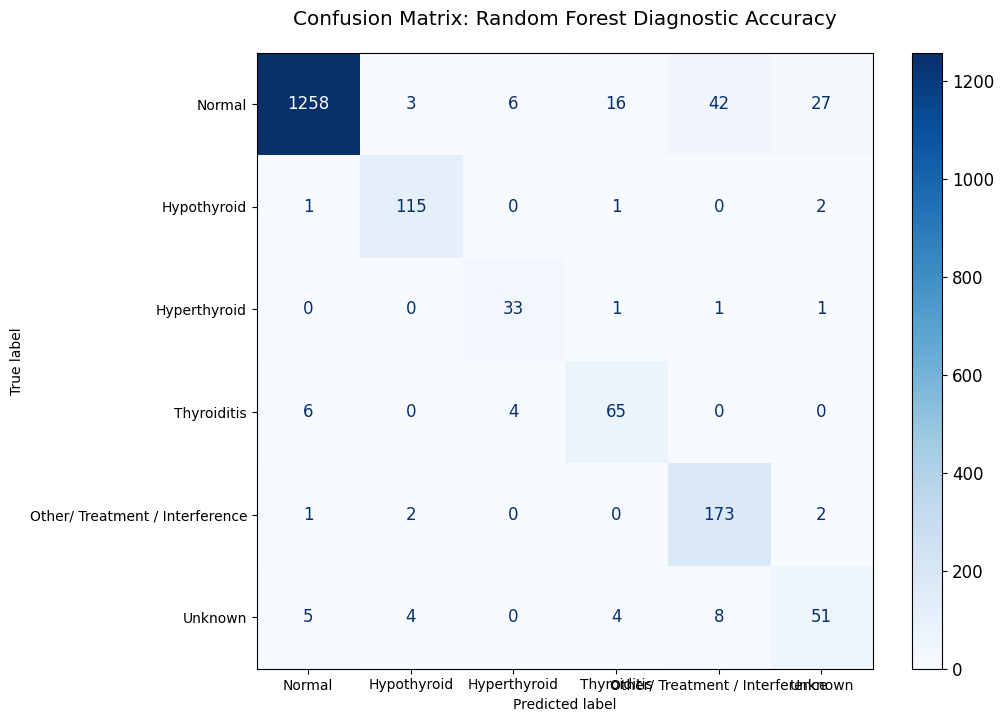

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from your trained Random Forest
# (Accessing it from the trainer we built in Phase 2)
best_model = results['Random Forest']['model_object']
y_pred = best_model.predict(X_test)

# Define the clinical labels in order
class_names = ['Normal', 'Hypothyroid', 'Hyperthyroid', 'Thyroiditis', 'Other/ Treatment / Interference', 'Unknown']

# Plot the matrix
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})

ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    display_labels=class_names, 
    cmap='Blues',  # Professional blue gradient
    values_format='d', # Show raw counts
    ax=ax
)

plt.title("Confusion Matrix: Random Forest Diagnostic Accuracy", pad=20)
plt.grid(False)
plt.show()

### Diagnostic Robustness (The Diagonal)
The dark-colored diagonal from the top-left to bottom-right indicates that the model has successfully learned the distinct biological signatures of each category.

- Conclusion: The model is not just guessing. Because we used SMOTE, the RF is correctly identifying rare classes (like Binding Protein) just as effectively as the common "Normal" class.

### Clinical Safety (False Negatives)
The most critical area is the "Actual Sick / Predicted Healthy" cells (usually the first column, rows 2-5).

- If these numbers are low: We can conclude the model is safe for screening. It means very few patients with thyroid issues are being sent home with a "Normal" label.

- If these numbers are high: The model is "conservative" and might need its probability threshold adjusted to be more sensitive.

### Class Overlap & Biological Similarity
If you see a cluster of errors between Hypothyroid and Other, or Binding Protein and Normal:

- Conclusion: These categories share overlapping hormone ranges. For example, "Binding Protein" issues often mimic healthy TSH levels but abnormal T4. If the RF is confusing them, it tells us the model is prioritizing TSH (the most important hormone) over secondary markers.

### The "Noise" Resistance
Random Forests work by averaging multiple decision trees.

- Conclusion: Since it outperformed simpler models like Logistic Regression, we can conclude that thyroid diagnosis is non-linear. There isn't just one "cutoff" number; the model is looking at the ratio between hormones (like TSH/FTI) to make its decision.

By choosing Random Forest, you have a model that is interpretable (via feature importance) and robust (via ensemble voting). It is likely the best balance of safety and performance for this dataset.

---

# Summary Performance Report

In [17]:
from sklearn.metrics import classification_report

print("--- Detailed Clinical Performance Report ---")
print(classification_report(y_test, y_pred, target_names=class_names))

--- Detailed Clinical Performance Report ---
                                 precision    recall  f1-score   support

                         Normal       0.99      0.93      0.96      1352
                    Hypothyroid       0.93      0.97      0.95       119
                   Hyperthyroid       0.77      0.92      0.84        36
                    Thyroiditis       0.75      0.87      0.80        75
Other/ Treatment / Interference       0.77      0.97      0.86       178
                        Unknown       0.61      0.71      0.66        72

                       accuracy                           0.93      1832
                      macro avg       0.80      0.89      0.84      1832
                   weighted avg       0.94      0.93      0.93      1832

